# Diabetes prediction

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

In [113]:
df=pd.read_csv("/config/workspace/dataset/diabetes.csv")

In [114]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Insight :- here we notice there is some zero values with Glucose, BloodPressure, SkinThickness, Insulin, BMI which not be possible. so we replace it with mean value.¶

In [116]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [117]:
col=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for i in col:
    df[i]=df[i].replace(0,np.mean(df[i]))

In [118]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
# for checking outliers

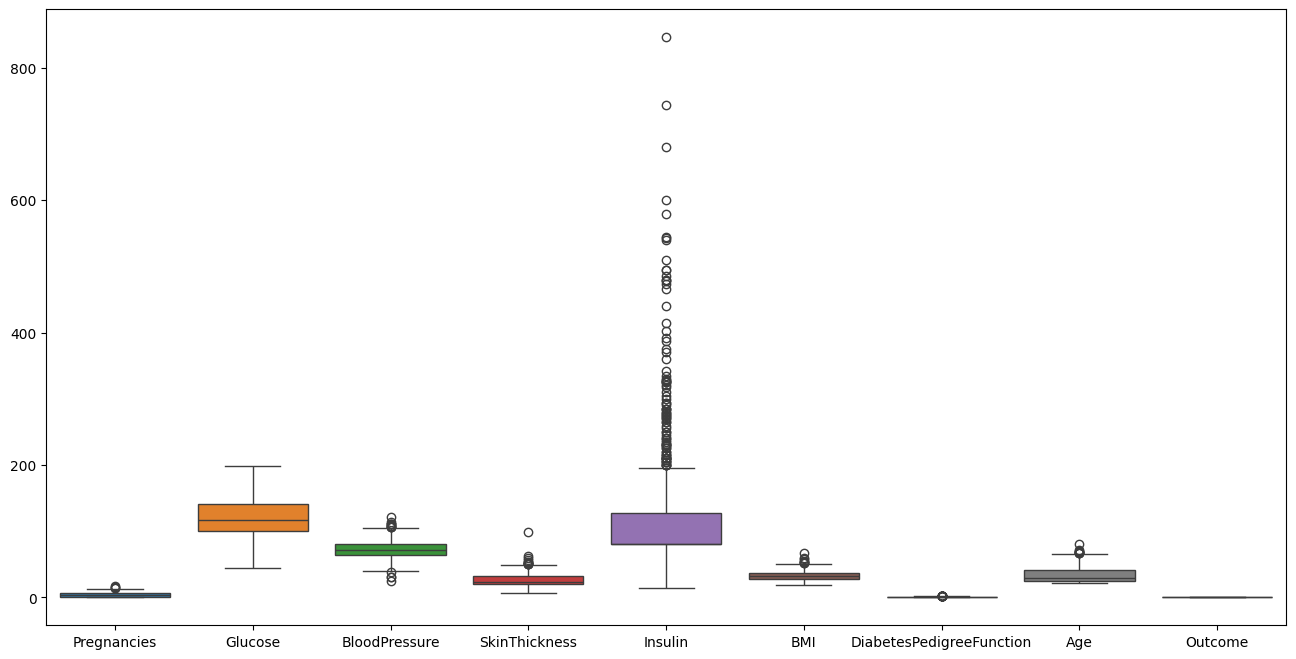

In [120]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.show()

<Axes: >

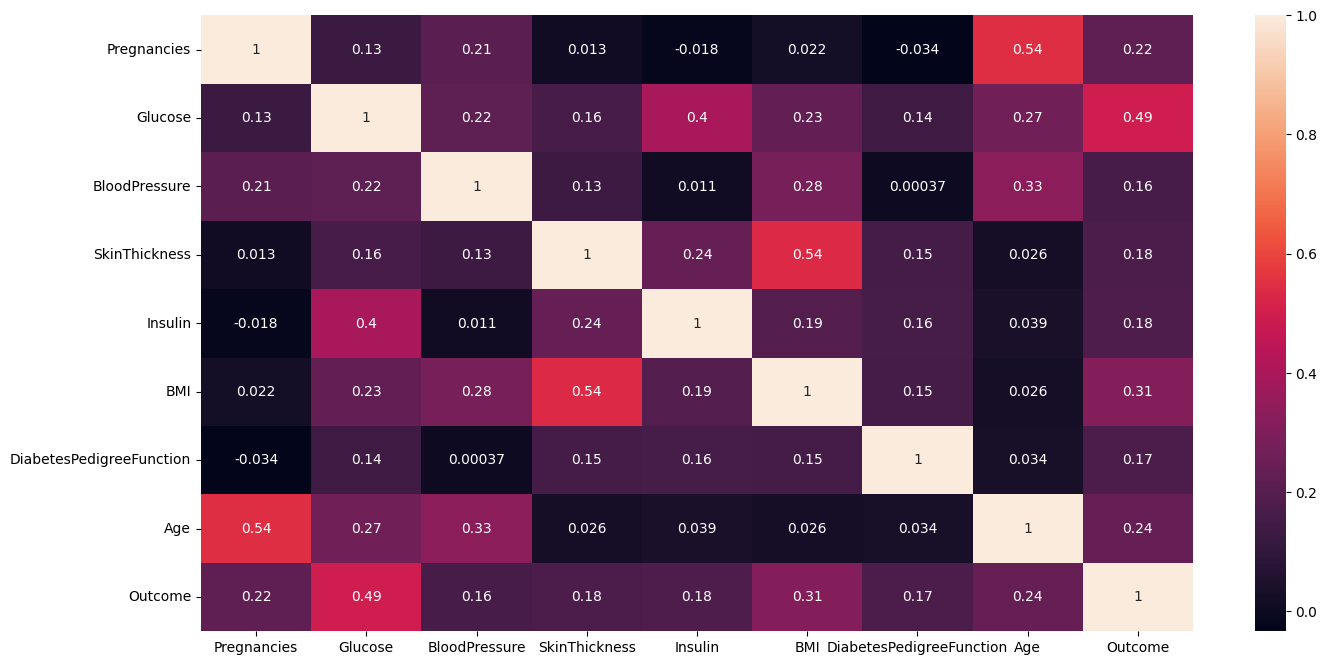

In [155]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [121]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24)

In [123]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [124]:
import pickle

In [125]:
# Standard_scaling:- standardization

In [126]:
def scaler_standard(x_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    
    #saving the model in pickel file
    file=open('/config/workspace/models/standardscaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled,x_test_scaled

In [127]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [128]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [130]:
# Now test for best parameter for our model we use GridSearchCV

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
parameters={'penalty':['l1', 'l2', 'elasticnet', None],'solver':['lbfgs','liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga'],'C': np.logspace(0,2,20)}

In [133]:
logrg=LogisticRegression()
clf=GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,scoring='accuracy',cv=10)


In [134]:
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [135]:
clf.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [136]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [137]:
clf.best_score_

0.7880822746521476

In [138]:
y_pred=clf.predict(x_test_scaled)

In [139]:
accuracy_score(y_test,y_pred)

0.7083333333333334

In [140]:
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

array([[107,  17],
       [ 39,  29]])

In [141]:
truepostive=c_matrix[0][0]
falsepostive=c_matrix[0][1]
falsenegative=c_matrix[1][0]
truenegative=c_matrix[1][0]

In [142]:
accuracy=(truepostive+truenegative)/(truepostive+falsenegative+falsepostive+truenegative)

In [143]:
import pickle

In [144]:
file=open('/config/workspace/models/modelforprediction.pkl','wb')
#file=open('modelforprediction.pkl','wb')
pickle.dump(clf,file)
file.close()

In [145]:
x_train_scaled

array([[-0.86696549,  0.66192779,  0.17544535, ..., -0.93354686,
        -0.64314075, -1.05262908],
       [-1.16456508, -0.47074231, -0.33598542, ..., -0.76989972,
         0.90063933, -0.10580088],
       [-0.56936589,  1.69751188,  1.3687838 , ..., -1.42448827,
        -0.43962925, -0.96655379],
       ...,
       [ 0.32343289, -0.01767427,  1.19830688, ...,  0.3309992 ,
        -0.54429231, -0.01972559],
       [ 0.91863208,  1.17971984, -0.50646234, ..., -0.30871233,
        -0.27391275,  0.23850029],
       [-0.86696549, -1.27979238, -0.33598542, ..., -2.12370785,
         0.42674827, -0.53617733]])

In [146]:
scaler=StandardScaler()

In [147]:
scaler.fit_transform(x_train)

array([[-0.86696549,  0.66192779,  0.17544535, ..., -0.93354686,
        -0.64314075, -1.05262908],
       [-1.16456508, -0.47074231, -0.33598542, ..., -0.76989972,
         0.90063933, -0.10580088],
       [-0.56936589,  1.69751188,  1.3687838 , ..., -1.42448827,
        -0.43962925, -0.96655379],
       ...,
       [ 0.32343289, -0.01767427,  1.19830688, ...,  0.3309992 ,
        -0.54429231, -0.01972559],
       [ 0.91863208,  1.17971984, -0.50646234, ..., -0.30871233,
        -0.27391275,  0.23850029],
       [-0.86696549, -1.27979238, -0.33598542, ..., -2.12370785,
         0.42674827, -0.53617733]])

In [148]:
scaler.transform([[12,148,78,35,94,33.6,0.351,31]])

array([[ 2.40663006,  0.82373781,  0.51639919,  0.87839893, -0.27449515,
         0.16735206, -0.36694658, -0.19187617]])

In [149]:
Standardscaler=pickle.load(open('/config/workspace/models/standardscaler.pkl','rb'))

In [150]:
Standardscaler.transform([[12,148,78,35,94,33.6,0.351,31]])

array([[ 2.40663006,  0.82373781,  0.51639919,  0.87839893, -0.27449515,
         0.16735206, -0.36694658, -0.19187617]])